In [1]:
from os import path
import matplotlib.pyplot as plt
from tabulate import tabulate
from apsfinal.tables import TBTAgent

### Step 1: Set initial variables and initialize agent

In [2]:
csv_in = path.join('..', 'data', 'healthcare-dataset-stroke-data-cleanbmi-containall.csv')  # Here, you can change the path you want
tbt_agent = TBTAgent(csv_in)

In [3]:
tbt_agent.df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3420,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
3421,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
3422,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
3423,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


### Step 2: Assign feature1 and feature2

In [4]:
# All feature names: gender, age, hypertension, heart_disease, ever_married, work_type,
#                    Residence_type, avg_glucose_level, bmi, smoking_status, stroke

In [5]:
feature1 = 'stroke' # top
feature2 = 'ever_married' # left

age_criteria = 43.227   # <: young, >:old
gluc_criteria = 106.148 # <: low, >:high
bmi_criteria = 28.893   # <: low, >:high

d_worktype = {'Work Type 1': ['children', 'Govt_job', 'Never_worked', 'Self-employed'],
              'Work Type 2': ['Private']}

### Step 3: Show Table

In [6]:
tbt_agent.show_two_by_two_table(feature1, feature2, age_criteria, gluc_criteria, bmi_criteria, d_worktype)

╒═══════════════╤════════╤═══════════╤═══════════╕
│               │ Stroke │ No Stroke │ Row Total │
├───────────────┼────────┼───────────┼───────────┤
│ Ever-Married  │ 160    │ 2439      │ 2599      │
├───────────────┼────────┼───────────┼───────────┤
│ Never-Married │ 20     │ 806       │ 826       │
├───────────────┼────────┼───────────┼───────────┤
│ Column Total  │ 180    │ 3245      │ 3425      │
╘═══════════════╧════════╧═══════════╧═══════════╛


### Step 4: Odds ratio $\hat{\theta}$ and 95% Confidence Interval of $\log(\hat{\theta})$

In [7]:
tbt_agent.get_odds_ratio_and_CI(feature1, feature2, age_criteria, gluc_criteria, bmi_criteria, d_worktype)

theta: 2.644
CI of log(theta): (0.501, 1.444)


### Step 5: Plot Condition Probability

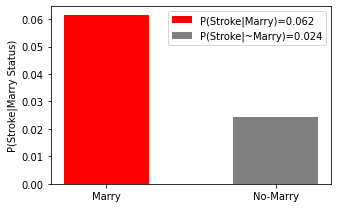

In [11]:
fig, ax = plt.subplots(figsize=(4.8,3))

width = 1

prob1 = 160/2599
prob2 = 20/826
ax.bar(1, prob1, width, color="red", label=f"P(Stroke|Marry)={prob1:.3f}")
ax.bar(3, prob2, width, color="grey",label=f"P(Stroke|~Marry)={prob2:.3f}")
ax.set_ylabel("P(Stroke|Marry Status)")
ax.set_xticks([1,3])
ax.set_xticklabels(["Marry","No-Marry"])
#ax.set_ylim(0,0.08)

ax.legend()
plt.tight_layout()
#plt.savefig("/home/yizaochen/Desktop/drawzone_temp/aps/condition_marry.svg")
plt.show()

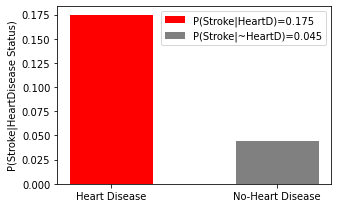

In [51]:
fig, ax = plt.subplots(figsize=(4.8,3))

width = 1

prob1 = 36/206
prob2 = 144/3219
ax.bar(1, prob1, width, color="red", label=f"P(Stroke|HeartD)={prob1:.3f}")
ax.bar(3, prob2, width, color="grey",label=f"P(Stroke|~HeartD)={prob2:.3f}")
ax.set_ylabel("P(Stroke|HeartDisease Status)")
ax.set_xticks([1,3])
ax.set_xticklabels(["Heart Disease","No-Heart Disease"])
#ax.set_ylim(0,0.08)

ax.legend()
plt.tight_layout()
#plt.savefig("/home/yizaochen/Desktop/drawzone_temp/aps/condition_heartD.svg")
plt.show()

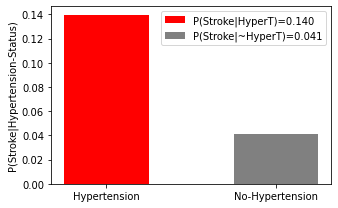

In [46]:
fig, ax = plt.subplots(figsize=(4.8,3))

width = 1

prob1 = 57/408
prob2 = 123/3017
ax.bar(1, prob1, width, color="red", label=f"P(Stroke|HyperT)={prob1:.3f}")
ax.bar(3, prob2, width, color="grey",label=f"P(Stroke|~HyperT)={prob2:.3f}")
ax.set_ylabel("P(Stroke|Hypertension-Status)")
ax.set_xticks([1,3])
ax.set_xticklabels(["Hypertension","No-Hypertension"])
#ax.set_ylim(0,0.08)

ax.legend()
plt.tight_layout()
#plt.savefig("/home/yizaochen/Desktop/drawzone_temp/aps/condition_hypert.svg")
plt.show()

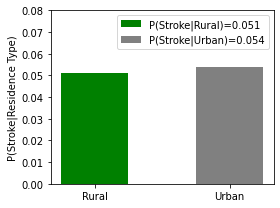

In [37]:
fig, ax = plt.subplots(figsize=(4,3))

width = 1

prob1 = 86/1680
prob2 = 94/1745
ax.bar(1, prob1, width, color="green", label=f"P(Stroke|Rural)={prob1:.3f}")
ax.bar(3, prob2, width, color="grey",label=f"P(Stroke|Urban)={prob2:.3f}")
ax.set_ylabel("P(Stroke|Residence Type)")
ax.set_xticks([1,3])
ax.set_xticklabels(["Rural","Urban"])
ax.set_ylim(0,0.08)

ax.legend()
plt.tight_layout()
#plt.savefig("/home/yizaochen/Desktop/drawzone_temp/aps/condition_residence_type.svg")
plt.show()

### Step 5: Customized Odds Ratio

In [4]:
import numpy as np

In [5]:
a = 220
b = 27
c = 3133
d = 986

In [6]:
theta = (a * d) / (b * c)
log_theta = np.log(theta)
inner_term = (1/a) + (1/b) + (1/c) + (1/d)
ci = 1.96 * np.sqrt(inner_term)
ci_left = log_theta - ci
ci_right = log_theta + ci

In [7]:
print(f'theta: {theta:.3f}')
print(f'CI of log(theta): ({ci_left:.3f}, {ci_right:.3f})')

theta: 2.564
CI of log(theta): (0.536, 1.348)
